<a href="https://colab.research.google.com/github/hwankang/chemometrics-tutorials/blob/master/14_(sat)_January_02_00am_SVR_with_linear_Data_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
filename_a='/content/drive/MyDrive/machine_learning/A_NIR_DATA_csv.csv'
import pandas as pd
data_a = pd.read_csv(filename_a,header=0, 
                   encoding="unicode-escape")

In [55]:
xx,yy=data_a.shape
xx

2039

In [56]:
data_a2=data_a.iloc[0::,1:yy+1]
data_a2.head()

,¸ðµ¨ Æ÷ÇÔ,Y_A,899.9280058,900.2520706,900.5763689,900.9009009,901.2256669,901.5506671,901.8759019,902.2013713,...,2477.700694,2480.15873,2482.621648,2485.089463,2487.562189,2490.039841,2492.522433,2495.00998,2497.502498,2500
0,True,24.0,0.098681,0.100515,0.102056,0.100267,0.096954,0.096161,0.097151,0.096790,...,2.968741,2.968988,2.958685,2.950201,2.950122,2.948725,2.939113,2.929406,2.929555,2.927579
1,True,24.0,0.098081,0.099926,0.101394,0.099664,0.096598,0.095915,0.096567,0.095609,...,2.960005,2.959948,2.951504,2.945633,2.947553,2.947326,2.937901,2.926926,2.924102,2.920722
2,True,24.0,0.089885,0.092072,0.094055,0.092618,0.089560,0.088900,0.089790,0.089088,...,2.943931,2.943679,2.930295,2.919846,2.920668,2.922776,2.913596,2.904503,2.903535,2.901086
3,True,23.6,0.088701,0.090287,0.091825,0.090534,0.087883,0.087348,0.088151,0.087593,...,2.935452,2.938259,2.928736,2.921757,2.924166,2.924666,2.914831,2.905151,2.902643,2.897351
4,True,23.6,0.095273,0.096945,0.098684,0.097460,0.094674,0.093949,0.094563,0.093743,...,2.966199,2.968021,2.955198,2.942411,2.943006,2.942151,2.931640,2.918549,2.918717,2.917849


In [57]:
import multiprocessing
import pandas as pd
import numpy as pd
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [58]:
ai=[]
for i in range(xx):
    if data_a2.iloc[i,0]==False:
        ai.append(i)
data_a3=data_a2.drop(ai,axis=0) #
data_a3
len(ai)
data_a3

,¸ðµ¨ Æ÷ÇÔ,Y_A,899.9280058,900.2520706,900.5763689,900.9009009,901.2256669,901.5506671,901.8759019,902.2013713,...,2477.700694,2480.15873,2482.621648,2485.089463,2487.562189,2490.039841,2492.522433,2495.00998,2497.502498,2500
0,True,24.00,0.098681,0.100515,0.102056,0.100267,0.096954,0.096161,0.097151,0.096790,...,2.968741,2.968988,2.958685,2.950201,2.950122,2.948725,2.939113,2.929406,2.929555,2.927579
1,True,24.00,0.098081,0.099926,0.101394,0.099664,0.096598,0.095915,0.096567,0.095609,...,2.960005,2.959948,2.951504,2.945633,2.947553,2.947326,2.937901,2.926926,2.924102,2.920722
2,True,24.00,0.089885,0.092072,0.094055,0.092618,0.089560,0.088900,0.089790,0.089088,...,2.943931,2.943679,2.930295,2.919846,2.920668,2.922776,2.913596,2.904503,2.903535,2.901086
3,True,23.60,0.088701,0.090287,0.091825,0.090534,0.087883,0.087348,0.088151,0.087593,...,2.935452,2.938259,2.928736,2.921757,2.924166,2.924666,2.914831,2.905151,2.902643,2.897351
4,True,23.60,0.095273,0.096945,0.098684,0.097460,0.094674,0.093949,0.094563,0.093743,...,2.966199,2.968021,2.955198,2.942411,2.943006,2.942151,2.931640,2.918549,2.918717,2.917849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2034,True,25.52,0.076506,0.075591,0.074629,0.072980,0.072275,0.072979,0.072688,0.070171,...,2.962918,2.970997,2.967865,2.957785,2.952054,2.949278,2.941087,2.935639,2.936698,2.938116
2035,True,25.52,0.071916,0.071201,0.070450,0.068871,0.068104,0.068746,0.068455,0.065891,...,2.982798,2.982529,2.968697,2.958179,2.962882,2.967330,2.958188,2.948901,2.948394,2.943151
2036,True,25.37,0.055557,0.054680,0.053789,0.052091,0.051338,0.052176,0.052068,0.049510,...,2.960384,2.958313,2.946722,2.938467,2.936874,2.936340,2.925951,2.920350,2.921682,2.917657
2037,True,25.37,0.050590,0.049846,0.049057,0.047327,0.046489,0.047292,0.047258,0.044905,...,2.968252,2.967836,2.953877,2.942397,2.945923,2.948910,2.940729,2.926084,2.923839,2.919868


In [59]:
x1,y1=data_a3.shape
data_a1=data_a3.iloc[0::,2:yy+1]
data_a1

,899.9280058,900.2520706,900.5763689,900.9009009,901.2256669,901.5506671,901.8759019,902.2013713,902.5270758,902.8530155,...,2477.700694,2480.15873,2482.621648,2485.089463,2487.562189,2490.039841,2492.522433,2495.00998,2497.502498,2500
0,0.098681,0.100515,0.102056,0.100267,0.096954,0.096161,0.097151,0.096790,0.095622,0.095521,...,2.968741,2.968988,2.958685,2.950201,2.950122,2.948725,2.939113,2.929406,2.929555,2.927579
1,0.098081,0.099926,0.101394,0.099664,0.096598,0.095915,0.096567,0.095609,0.094073,0.093994,...,2.960005,2.959948,2.951504,2.945633,2.947553,2.947326,2.937901,2.926926,2.924102,2.920722
2,0.089885,0.092072,0.094055,0.092618,0.089560,0.088900,0.089790,0.089088,0.087585,0.087353,...,2.943931,2.943679,2.930295,2.919846,2.920668,2.922776,2.913596,2.904503,2.903535,2.901086
3,0.088701,0.090287,0.091825,0.090534,0.087883,0.087348,0.088151,0.087593,0.086458,0.086425,...,2.935452,2.938259,2.928736,2.921757,2.924166,2.924666,2.914831,2.905151,2.902643,2.897351
4,0.095273,0.096945,0.098684,0.097460,0.094674,0.093949,0.094563,0.093743,0.092318,0.092116,...,2.966199,2.968021,2.955198,2.942411,2.943006,2.942151,2.931640,2.918549,2.918717,2.917849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2034,0.076506,0.075591,0.074629,0.072980,0.072275,0.072979,0.072688,0.070171,0.068566,0.069321,...,2.962918,2.970997,2.967865,2.957785,2.952054,2.949278,2.941087,2.935639,2.936698,2.938116
2035,0.071916,0.071201,0.070450,0.068871,0.068104,0.068746,0.068455,0.065891,0.064076,0.064532,...,2.982798,2.982529,2.968697,2.958179,2.962882,2.967330,2.958188,2.948901,2.948394,2.943151
2036,0.055557,0.054680,0.053789,0.052091,0.051338,0.052176,0.052068,0.049510,0.047720,0.048518,...,2.960384,2.958313,2.946722,2.938467,2.936874,2.936340,2.925951,2.920350,2.921682,2.917657
2037,0.050590,0.049846,0.049057,0.047327,0.046489,0.047292,0.047258,0.044905,0.043365,0.044220,...,2.968252,2.967836,2.953877,2.942397,2.945923,2.948910,2.940729,2.926084,2.923839,2.919868


In [60]:
data_a1_n=data_a1.to_numpy()
data_a1_input=data_a1_n
data_a1_input

array([[0.09868074, 0.1005148 , 0.10205633, ..., 2.92940605, 2.9295551 ,
        2.92757921],
       [0.0980814 , 0.09992567, 0.10139396, ..., 2.92692573, 2.92410227,
        2.92072185],
       [0.08988517, 0.09207206, 0.0940546 , ..., 2.90450321, 2.90353459,
        2.90108571],
       ...,
       [0.05555697, 0.05468017, 0.05378911, ..., 2.92035018, 2.92168167,
        2.917657  ],
       [0.05058956, 0.0498458 , 0.04905745, ..., 2.92608398, 2.92383935,
        2.91986778],
       [0.06383698, 0.06289033, 0.06214161, ..., 2.94809062, 2.94902612,
        2.9431105 ]])

In [61]:
data_a1_output=data_a3.iloc[0::,1:2]
data_a1_output.head()

,Y_A
0,24.0
1,24.0
2,24.0
3,23.6
4,23.6


In [62]:
data_a1_output_n=data_a1_output.to_numpy().flatten()
data_a1_target=data_a1_output_n
data_a1_target

array([24.  , 24.  , 24.  , ..., 25.37, 25.37, 25.37])

In [63]:
import multiprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [64]:
from sklearn.svm import SVR, SVC
from sklearn.datasets import load_boston, load_diabetes
from sklearn.datasets import load_breast_cancer, load_iris, load_wine
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.model_selection import train_test_split,cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE


#SVM을 사용한 분류모델 
# 커널기법

In [65]:
#X,y = load_boston(return_X_y=True)
X=data_a1_input
y=data_a1_target
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=123)

model = SVR()
model.fit(X_train, y_train)

print("힉습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

힉습 데이터 점수:-8.633173997396604e-05
평가 데이터 점수:0.006401729979206516


# 시작 아님

In [ ]:
#no
X,y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=123)

model = SVC()
model.fit(X_train, y_train)

print("힉습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

#커널기법

In [ ]:
#no
X,y=load_boston(return_X_y=True)
X_train, X_test,y_train, y_test=train_test_split(X,y,random_state=123)

linear_svr=SVR(kernel='linear')
linear_svr.fit(X_train,y_train)

print("Linear SVR 힉습 데이터 점수:{}".format(linear_svr.score(X_train, y_train)))
print("Linear SVR 평가 데이터 점수:{}".format(linear_svr.score(X_test, y_test)))

poly_svr=SVR(kernel='poly')
poly_svr.fit(X_train,y_train)

print("Polynomial SVR 힉습 데이터 점수:{}".format(poly_svr.score(X_train, y_train)))
print("Polynomial SVR 평가 데이터 점수:{}".format(poly_svr.score(X_test, y_test)))

rbf_svr=SVR(kernel='rbf')
rbf_svr.fit(X_train,y_train)

print("RBF SVR 힉습 데이터 점수:{}".format(rbf_svr.score(X_train, y_train)))
print("RBF SVR 평가 데이터 점수:{}".format(rbf_svr.score(X_test, y_test)))

In [ ]:
#no

In [ ]:
X,y=load_breast_cancer(return_X_y=True)
X_train, X_test,y_train, y_test=train_test_split(X,y,random_state=123)

linear_svc=SVC(kernel='linear')
linear_svc.fit(X_train,y_train)

print("Linear SVC 힉습 데이터 점수:{}".format(linear_svc.score(X_train, y_train)))
print("Linear SVC 평가 데이터 점수:{}".format(linear_svc.score(X_test, y_test)))

poly_svc=SVC(kernel='poly')
poly_svc.fit(X_train,y_train)

print("Polynomial SVC 힉습 데이터 점수:{}".format(poly_svc.score(X_train, y_train)))
print("Polynomial SVC 평가 데이터 점수:{}".format(poly_svc.score(X_test, y_test)))

rbf_svc=SVC(kernel='rbf')
rbf_svc.fit(X_train,y_train)

print("RBF SVR 힉습 데이터 점수:{}".format(rbf_svc.score(X_train, y_train)))
print("RBF SVR 평가 데이터 점수:{}".format(rbf_svc.score(X_test, y_test)))

#매개변수 튜닝

In [ ]:
X,y=load_breast_cancer(return_X_y=True)
X_train, X_test,y_train, y_test=train_test_split(X,y,random_state=123)

poly_svc=SVC(kernel='poly',degree=2,C=0.1,gamma='auto')
poly_svc.fit(X_train,y_train)

print("kernel=poly, degree={},C={},gamma={}".format(2,0.1,'auto'))

print("Polynomial SVC 힉습 데이터 점수:{}".format(poly_svc.score(X_train, y_train)))
print("Polynomial SVC 평가 데이터 점수:{}".format(poly_svc.score(X_test, y_test)))


In [ ]:
rbf_svc=SVC(kernel='rbf',C=2.0, gamma='scale')
rbf_svc.fit(X_train,y_train)
print("kernel=rbf,C={},gamma={}".format(2,0,'scale'))
print("RBF SVR 힉습 데이터 점수:{}".format(rbf_svc.score(X_train, y_train)))
print("RBF SVR 평가 데이터 점수:{}".format(rbf_svc.score(X_test, y_test)))

In [ ]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
model=SVC()
model.fit(X_train,y_train)

In [ ]:
print("SVC 힉습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("SVC 평가 데이터 점수:{}".format(model.score(X_test, y_test)))

In [ ]:
#no end 

#끝 아님

#Linear SVR

In [66]:
#X,y=load_boston(return_X_y=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [67]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [68]:
model=SVR(kernel='linear')
model.fit(X_train,y_train)

SVR(kernel='linear')

In [69]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

학습 데이터 점수:0.8359003386245629
평가 데이터 점수:0.8190583760492958


#시작 아님

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


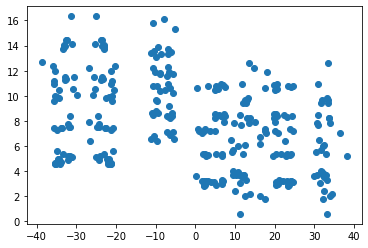

In [ ]:
X_comp=TSNE(n_components=1).fit_transform(X)
import matplotlib.pyplot as plt
plt.scatter(X_comp,y);

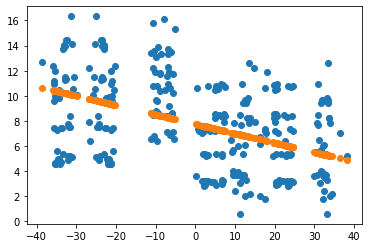

In [ ]:
model.fit(X_comp,y)
predict=model.predict(X_comp)
plt.scatter(X_comp,y)
plt.scatter(X_comp,predict)


# 끝 아님

In [71]:
estimator=make_pipeline(StandardScaler(), SVR(kernel='linear'))
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=10,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:  3.3min finished


{'fit_time': array([44.31094742, 38.25060463, 32.3033452 , 38.87156415, 37.28843188,
        38.08276153, 35.63221478, 41.39483452, 36.03276968, 36.80864978]),
 'score_time': array([0.10906577, 0.12387896, 0.14230728, 0.12940049, 0.13502312,
        0.11634874, 0.11140013, 0.12912536, 0.11769128, 0.0915997 ]),
 'test_score': array([-0.21539883,  0.74065441,  0.73518473, -0.09551218, -0.38930481,
         0.30749357,  0.56183708,  0.26724156,  0.45920023, -0.91350975])}

In [74]:
estimator=make_pipeline(StandardScaler(), SVR(C=1,epsilon=0.01, kernel='linear'))
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=10,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:  3.6min finished


{'fit_time': array([54.86790538, 42.08279133, 38.49803638, 41.71678329, 41.59811091,
        40.15093613, 34.21028447, 42.44644856, 40.9179554 , 37.99077439]),
 'score_time': array([0.14520168, 0.15876818, 0.13994813, 0.18364024, 0.15139341,
        0.16098428, 0.17294049, 0.14204597, 0.15835619, 0.12970066]),
 'test_score': array([-0.21762199,  0.73031222,  0.74069704, -0.27143772, -0.42472406,
         0.31427963,  0.54013538,  0.26577787,  0.44538794, -0.88835486])}

In [76]:
estimator=make_pipeline(StandardScaler(), SVR(C=1,epsilon=0.1, kernel='linear'))
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=10,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:  3.3min finished


{'fit_time': array([43.3610239 , 37.35557556, 32.40018439, 38.49851894, 37.24690747,
        37.16643381, 36.42470789, 42.50161791, 36.18902206, 37.23331022]),
 'score_time': array([0.15127325, 0.11881876, 0.12438893, 0.13166332, 0.13200712,
        0.11039472, 0.11659479, 0.11420822, 0.11578274, 0.09165406]),
 'test_score': array([-0.21539883,  0.74065441,  0.73518473, -0.09551218, -0.38930481,
         0.30749357,  0.56183708,  0.26724156,  0.45920023, -0.91350975])}

In [77]:
estimator=make_pipeline(StandardScaler(), SVR(C=1,epsilon=1, kernel='linear'))
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=10,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:  1.1min finished


{'fit_time': array([12.9992044 , 11.83990788,  9.54909754, 14.66217375, 12.90816689,
        13.88346076, 10.15343118, 14.12975073, 16.16010785,  9.75863791]),
 'score_time': array([0.03947806, 0.0374558 , 0.03556204, 0.03851318, 0.03909206,
        0.03477621, 0.03568673, 0.0377562 , 0.03924251, 0.02601385]),
 'test_score': array([-0.20715028,  0.78076187,  0.65701595, -0.97369037, -0.65400639,
         0.2942375 ,  0.61766293,  0.2854115 ,  0.50103402, -0.25202496])}

In [78]:
estimator=make_pipeline(StandardScaler(), SVR(C=1,epsilon=0.005, kernel='linear'))
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=10,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:  3.7min finished


{'fit_time': array([50.77648115, 41.19577026, 37.73348856, 41.04864931, 45.44198155,
        39.57706904, 36.70932627, 44.29875088, 44.1561296 , 43.46740389]),
 'score_time': array([0.16791821, 0.15479112, 0.13799405, 0.14439344, 0.15623999,
        0.14823031, 0.14236999, 0.13988185, 0.14500451, 0.1332221 ]),
 'test_score': array([-0.21698894,  0.7307842 ,  0.7408583 , -0.28305876, -0.42482602,
         0.31704586,  0.53748149,  0.26725192,  0.44439404, -0.88317579])}

In [72]:
estimator=make_pipeline(StandardScaler(), SVR(kernel='rbf'))
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=10,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   15.8s finished


{'fit_time': array([2.79268479, 2.72805238, 2.75262761, 2.78262353, 2.71991611,
        2.73942637, 2.71337438, 2.7714088 , 2.52840066, 2.62508821]),
 'score_time': array([0.43856263, 0.42975545, 0.41449714, 0.43228221, 0.45034862,
        0.42650151, 0.4560256 , 0.42637277, 0.46216726, 0.34010172]),
 'test_score': array([-1.13085152, -0.06802894, -0.50600902, -1.23224366, -0.22152989,
        -0.00750976, -1.23306007, -0.13875001, -0.06794645, -0.6500891 ])}

In [73]:
estimator=make_pipeline(StandardScaler(), SVR(C=0.1, epsilon=0.1,kernel='rbf'))
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=10,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   16.1s finished


{'fit_time': array([2.6910758 , 2.68198967, 2.75212026, 2.81838012, 2.79139543,
        2.81386733, 2.83913136, 2.8734374 , 2.7264359 , 2.75623918]),
 'score_time': array([0.41799116, 0.4227221 , 0.41686821, 0.42087173, 0.43119287,
        0.40774965, 0.45306921, 0.45277977, 0.44497991, 0.38728976]),
 'test_score': array([-1.75269975, -0.25070408, -0.72213641, -2.2350503 , -0.17842138,
        -0.00249179, -1.0362993 , -0.18014915, -0.14742434, -0.47679032])}

In [24]:
estimator=make_pipeline(StandardScaler(), SVR(kernel='poly'))
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=10,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   15.7s finished


{'fit_time': array([2.71706104, 2.72769785, 2.69516158, 2.65559673, 2.78679037,
        2.77970552, 3.37390876, 3.07687998, 2.97727013, 3.01493335]),
 'score_time': array([0.24581623, 0.26024127, 0.26982331, 0.27196884, 0.27044988,
        0.26214695, 0.2523582 , 0.28508639, 0.2457273 , 0.08690429]),
 'test_score': array([-1.87829323e+00, -2.81211017e-01, -3.40146217e-01, -8.41667750e-01,
        -3.78486404e-01,  7.22886188e-02, -6.88182251e-01, -1.06393898e-03,
         3.41467659e-01, -3.26115915e-02])}

In [25]:
estimator=make_pipeline(StandardScaler(), SVR(kernel='sigmoid'))
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=10,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   16.4s finished


{'fit_time': array([3.02157426, 3.00966644, 3.00670385, 3.00721645, 2.97930479,
        2.99901819, 2.93117738, 2.97101021, 2.76421142, 2.83217263]),
 'score_time': array([0.3363924 , 0.34201002, 0.3393271 , 0.33070302, 0.29472613,
        0.30060935, 0.27944636, 0.30364823, 0.30064821, 0.22025824]),
 'test_score': array([ -873.78244912,   -96.34059176,  -178.67718673, -1344.92533856,
        -1079.66679828, -2013.27027487,   -87.31848416, -1259.36388426,
         -749.92078475,  -763.55753072])}

In [26]:
pipe=Pipeline([('scaler',StandardScaler()),
               ('model', SVR(kernel='linear'))])
param_grid=[{'model__gamma':['scale','auto'],
              'model__C':[1.0, 0.1, 0.01],
              'model__epsilon':[1.0, 0.1, 0.01]}]
gs=GridSearchCV(
    estimator=pipe,
    param_grid = param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)



In [27]:
gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='linear'))]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [28]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(C=0.1, epsilon=0.01, kernel='linear'))])

In [29]:
model=gs.best_estimator_
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(C=0.1, epsilon=0.01, kernel='linear'))])

In [30]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

학습 데이터 점수:0.7523130233842064
평가 데이터 점수:0.7126604225342954


In [ ]:
# no start------------------------------

#당뇨병

In [ ]:
X,y=load_diabetes(return_X_y=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
model=SVR(kernel='linear')
model.fit(X_train,y_train)

In [ ]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

In [ ]:
X_comp=TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp,y);

In [ ]:
model.fit(X_comp,y)
predict=model.predict(X_comp)
plt.scatter(X_comp,y)
plt.scatter(X_comp,predict)


In [ ]:
estimator=make_pipeline(StandardScaler(), SVR(kernel='linear'))
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [ ]:
pipe=Pipeline([('scaler',StandardScaler()),
               ('model', SVR(kernel='linear'))])
param_grid=[{'model__gamma':['scale','auto'],
              'model__C':[1.0, 0.1, 0.01],
              'model__epsilon':[1.0, 0.1, 0.01]}]
gs=GridSearchCV(
    estimator=pipe,
    param_grid = param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)



In [ ]:
gs.fit(X,y)

In [ ]:
gs.best_estimator_

#당뇨병


In [ ]:
#no end ------------------------

In [31]:
#X,y=load_diabetes(return_X_y=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [32]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [33]:
model=SVR(kernel='rbf')
model.fit(X_train,y_train)

SVR()

In [34]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

학습 데이터 점수:0.36347457856147947
평가 데이터 점수:0.28840860929878154


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


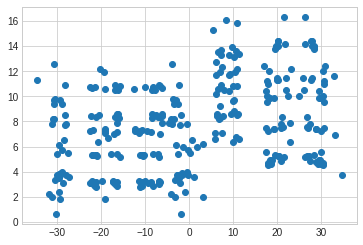

In [ ]:
X_comp=TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp,y);

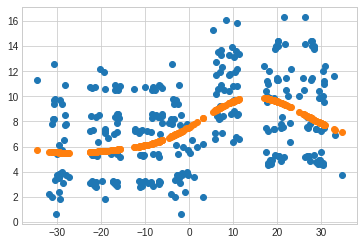

In [ ]:
model.fit(X_comp,y)
predict=model.predict(X_comp)
plt.scatter(X_comp,y)
plt.scatter(X_comp,predict)


In [35]:
estimator=make_pipeline(StandardScaler(), SVR(kernel='rbf'))
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    7.2s finished


{'fit_time': array([2.16882086, 2.17559576, 2.08235359, 2.15419555, 0.964679  ]),
 'score_time': array([0.77614141, 0.81867838, 0.74545097, 0.80946922, 0.38967323]),
 'test_score': array([-1.15944887, -0.87340122, -0.08337016, -0.97905145, -1.48757937])}

#RBF, POlynomial, Sigmoid RBF--Best

In [36]:
pipe=Pipeline([('scaler',StandardScaler()),
               ('model', SVR(kernel='rbf'))])
param_grid=[{'model__kernel':['rbf','polynomial', 'sigmoid']}]
        
gs=GridSearchCV(
    estimator=pipe,
    param_grid = param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)



In [37]:
gs.fit(X,y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/usr/local

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=2,
             param_grid=[{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}],
             verbose=True)

In [38]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR())])

In [39]:
model=gs.best_estimator_
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR())])

In [40]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

학습 데이터 점수:0.3634745785614796
평가 데이터 점수:0.2884086092987814


#RBF

In [41]:
pipe=Pipeline([('scaler',StandardScaler()),
               ('model', SVR(kernel='rbf'))])
param_grid=[{'model__gamma':['scale','auto'],
             'model__C':[1.0, 0.1,0.01],
             'model__epsilon':[1.0, 0.1, 0.01]}]
        
gs=GridSearchCV(
    estimator=pipe,
    param_grid = param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)



In [42]:
pipe=Pipeline([('scaler',StandardScaler()),
               ('model', SVR(kernel='rbf'))])
param_grid=[{'model__gamma':['scale','auto'],
             'model__C':[1.0, 0.1,0.01],
             'model__epsilon':[1.0, 0.1, 0.01]}]
        
gs=GridSearchCV(
    estimator=pipe,
    param_grid = param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)
gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [43]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(C=0.01, epsilon=0.01))])

In [44]:
model=gs.best_estimator_
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(C=0.01, epsilon=0.01))])

In [45]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

학습 데이터 점수:0.02625742476922166
평가 데이터 점수:0.014188933178353902


#sigmoid

In [46]:
pipe=Pipeline([('scaler',StandardScaler()),
               ('model', SVR(kernel='sigmoid'))])
param_grid=[{'model__gamma':['scale','auto'],
             'model__C':[1.0, 0.1,0.01],
             'model__epsilon':[1.0, 0.1, 0.01]}]
        
gs=GridSearchCV(
    estimator=pipe,
    param_grid = param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)



In [47]:
gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='sigmoid'))]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [48]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(C=0.01, epsilon=0.01, kernel='sigmoid'))])

In [49]:
model=gs.best_estimator_
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(C=0.01, epsilon=0.01, kernel='sigmoid'))])

In [50]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

학습 데이터 점수:-0.007698766626828446
평가 데이터 점수:-0.00580195584963783


#Polynomial

In [51]:
pipe=Pipeline([('scaler',StandardScaler()),
               ('model', SVR(kernel='sigmoid'))])
param_grid=[{'model__gamma':['scale','auto'],
             'model__C':[1.0, 0.1,0.01],
             'model__epsilon':[1.0, 0.1, 0.01]}]
        
gs=GridSearchCV(
    estimator=pipe,
    param_grid = param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)
gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='sigmoid'))]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [52]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(C=0.01, epsilon=0.01, kernel='sigmoid'))])

In [53]:
model=gs.best_estimator_
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(C=0.01, epsilon=0.01, kernel='sigmoid'))])

In [54]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

학습 데이터 점수:-0.007698766626828446
평가 데이터 점수:-0.00580195584963783


In [ ]:
#no start---------------------------------------

# 이후는 분류기 문제임 
#linear SVC
#유방암 

In [ ]:
X,y=load_breast_cancer(return_X_y=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
model=SVC(kernel='linear')
model.fit(X_train,y_train)

In [ ]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

In [ ]:
import numpy as np
def make_meshgrid(x,y,h=.02):
    x_min,x_max=x.min()-1,x.max()+1
    y_min,y_max=y.min()-1,y.max()+1
    xx,yy = np.meshgrid(np.arange(x_min,x_max,h),
                        np.arange(y_min,y_max,h))
    return xx, yy

In [ ]:
def plot_contours(clf,xx,yy,**params):
    Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    out=plt.contourf(xx,yy,Z,**params)

    return out

In [ ]:
X_comp=TSNE(n_components=2).fit_transform(X)
X0,X1=X_comp[:,0],X_comp[:,1]
xx,yy=make_meshgrid(X0,X1)

In [ ]:
model.fit(X_comp,y)
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0,X1,c=y, cmap=plt.cm.coolwarm,s=20,edgecolors='k');


In [ ]:
estimator=make_pipeline(StandardScaler(), SVC(kernel='linear'))
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [ ]:
pipe=Pipeline([('scaler',StandardScaler()),
               ('model', SVC(kernel='linear'))])
param_grid=[{'model__gamma':['scale','auto'],
             'model__C':[1.0,0.1,0.01]}]
        
gs=GridSearchCV(
    estimator=pipe,
    param_grid = param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)
gs.fit(X,y)


In [ ]:
gs.best_estimator_

In [ ]:
model=gs.best_estimator_
model.fit(X_train, y_train)

In [ ]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

#붓꽃

In [ ]:
X,y=load_iris(return_X_y=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
model=SVC(kernel='linear')
model.fit(X_train,y_train)

In [ ]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

In [ ]:
import numpy as np
def make_meshgrid(x,y,h=.02):
    x_min,x_max=x.min()-1,x.max()+1
    y_min,y_max=y.min()-1,y.max()+1
    xx,yy = np.meshgrid(np.arange(x_min,x_max,h),
                        np.arange(y_min,y_max,h))
    return xx, yy

In [ ]:
def plot_contours(clf,xx,yy,**params):
    Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    out=plt.contourf(xx,yy,Z,**params)

    return out

In [ ]:
X_comp=TSNE(n_components=2).fit_transform(X)
X0,X1=X_comp[:,0],X_comp[:,1]
xx,yy=make_meshgrid(X0,X1)

In [ ]:
model.fit(X_comp,y)
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0,X1,c=y, cmap=plt.cm.coolwarm,s=20,edgecolors='k');


In [ ]:
estimator=make_pipeline(StandardScaler(), SVC(kernel='linear'))
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [ ]:
pipe=Pipeline([('scaler',StandardScaler()),
               ('model', SVC(kernel='linear'))])
param_grid=[{'model__gamma':['scale','auto'],
             'model__C':[1.0,0.1,0.01]}]
        
gs=GridSearchCV(
    estimator=pipe,
    param_grid = param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)
gs.fit(X,y)


In [ ]:
gs.best_estimator_

In [ ]:
model=gs.best_estimator_
model.fit(X_train, y_train)

In [ ]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

#와인

In [ ]:
X,y=load_wine(return_X_y=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
model=SVC(kernel='linear')
model.fit(X_train,y_train)

In [ ]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

In [ ]:
import numpy as np
def make_meshgrid(x,y,h=.02):
    x_min,x_max=x.min()-1,x.max()+1
    y_min,y_max=y.min()-1,y.max()+1
    xx,yy = np.meshgrid(np.arange(x_min,x_max,h),
                        np.arange(y_min,y_max,h))
    return xx, yy

In [ ]:
def plot_contours(clf,xx,yy,**params):
    Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    out=plt.contourf(xx,yy,Z,**params)

    return out

In [ ]:
X_comp=TSNE(n_components=2).fit_transform(X)
X0,X1=X_comp[:,0],X_comp[:,1]
xx,yy=make_meshgrid(X0,X1)

In [ ]:
model.fit(X_comp,y)
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0,X1,c=y, cmap=plt.cm.coolwarm,s=20,edgecolors='k');


In [ ]:
estimator=make_pipeline(StandardScaler(), SVC(kernel='linear'))
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [ ]:
pipe=Pipeline([('scaler',StandardScaler()),
               ('model', SVC(kernel='linear'))])
param_grid=[{'model__gamma':['scale','auto'],
             'model__C':[1.0,0.1,0.01]}]
        
gs=GridSearchCV(
    estimator=pipe,
    param_grid = param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)
gs.fit(X,y)


In [ ]:
gs.best_estimator_

In [ ]:
model=gs.best_estimator_
model.fit(X_train, y_train)

In [ ]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

#붓꽃

In [ ]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

In [ ]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

In [ ]:
pipe=Pipeline([('scaler',StandardScaler()),
               ('model', SVR(kernel='rbf'))])
param_grid=[{'model__kernel':['rbf','polynomial', 'sigmoid']}]
        
gs=GridSearchCV(
    estimator=pipe,
    param_grid = param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)



In [ ]:
gs.fit(X,y)

In [ ]:
gs.best_estimator_

#유방암

In [ ]:
X,y=load_breast_cancer(return_X_y=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
model=SVC(kernel='rbf')
model.fit(X_train,y_train)

In [ ]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

In [ ]:
import numpy as np
def make_meshgrid(x,y,h=.02):
    x_min,x_max=x.min()-1,x.max()+1
    y_min,y_max=y.min()-1,y.max()+1
    xx,yy = np.meshgrid(np.arange(x_min,x_max,h),
                        np.arange(y_min,y_max,h))
    return xx, yy

In [ ]:
def plot_contours(clf,xx,yy,**params):
    Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    out=plt.contourf(xx,yy,Z,**params)

    return out

In [ ]:
X_comp=TSNE(n_components=2).fit_transform(X)
X0,X1=X_comp[:,0],X_comp[:,1]
xx,yy=make_meshgrid(X0,X1)

In [ ]:
model.fit(X_comp,y)
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0,X1,c=y, cmap=plt.cm.coolwarm,s=20,edgecolors='k');


In [ ]:
estimator=make_pipeline(StandardScaler(), SVC(kernel='linear'))
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [ ]:
pipe=Pipeline([('scaler',StandardScaler()),
               ('model', SVC(kernel='rbf'))])
param_grid=[{'model__gamma':['scale','auto'],
             'model__C':[1.0,0.1,0.01]}]
        
gs=GridSearchCV(
    estimator=pipe,
    param_grid = param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)
gs.fit(X,y)


In [ ]:
gs.best_estimator_

In [ ]:
model=gs.best_estimator_
model.fit(X_train, y_train)

In [ ]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

#붓꽃

In [ ]:
X,y=load_iris(return_X_y=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
model=SVC(kernel='rbf')
model.fit(X_train,y_train)

In [ ]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

In [ ]:
import numpy as np
def make_meshgrid(x,y,h=.02):
    x_min,x_max=x.min()-1,x.max()+1
    y_min,y_max=y.min()-1,y.max()+1
    xx,yy = np.meshgrid(np.arange(x_min,x_max,h),
                        np.arange(y_min,y_max,h))
    return xx, yy

In [ ]:
def plot_contours(clf,xx,yy,**params):
    Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    out=plt.contourf(xx,yy,Z,**params)

    return out

In [ ]:
X_comp=TSNE(n_components=2).fit_transform(X)
X0,X1=X_comp[:,0],X_comp[:,1]
xx,yy=make_meshgrid(X0,X1)

In [ ]:
model.fit(X_comp,y)
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0,X1,c=y, cmap=plt.cm.coolwarm,s=20,edgecolors='k');


In [ ]:
estimator=make_pipeline(StandardScaler(), SVC(kernel='linear'))
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [ ]:
pipe=Pipeline([('scaler',StandardScaler()),
               ('model', SVC(kernel='rbf'))])
param_grid=[{'model__gamma':['scale','auto'],
             'model__C':[1.0,0.1,0.01]}]
        
gs=GridSearchCV(
    estimator=pipe,
    param_grid = param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)
gs.fit(X,y)


In [ ]:
gs.best_estimator_

In [ ]:
model=gs.best_estimator_
model.fit(X_train, y_train)

In [ ]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

#와인

In [ ]:
X,y=load_wine(return_X_y=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
model=SVC(kernel='rbf')
model.fit(X_train,y_train)

In [ ]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

In [ ]:
import numpy as np
def make_meshgrid(x,y,h=.02):
    x_min,x_max=x.min()-1,x.max()+1
    y_min,y_max=y.min()-1,y.max()+1
    xx,yy = np.meshgrid(np.arange(x_min,x_max,h),
                        np.arange(y_min,y_max,h))
    return xx, yy

In [ ]:
def plot_contours(clf,xx,yy,**params):
    Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    out=plt.contourf(xx,yy,Z,**params)

    return out

In [ ]:
X_comp=TSNE(n_components=2).fit_transform(X)
X0,X1=X_comp[:,0],X_comp[:,1]
xx,yy=make_meshgrid(X0,X1)

In [ ]:
model.fit(X_comp,y)
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.7)
plt.scatter(X0,X1,c=y, cmap=plt.cm.coolwarm,s=20,edgecolors='k');


In [ ]:
estimator=make_pipeline(StandardScaler(), SVC(kernel='linear'))
cross_validate(
    estimator=estimator,
    X=X, y=y,
    cv=5,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [ ]:
pipe=Pipeline([('scaler',StandardScaler()),
               ('model', SVC(kernel='rbf'))])
param_grid=[{'model__gamma':['scale','auto'],
             'model__C':[1.0,0.1,0.01]}]
        
gs=GridSearchCV(
    estimator=pipe,
    param_grid = param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)
gs.fit(X,y)


In [ ]:
gs.best_estimator_

In [ ]:
model=gs.best_estimator_
model.fit(X_train, y_train)

In [ ]:
print("학습 데이터 점수:{}".format(model.score(X_train, y_train)))
print("평가 데이터 점수:{}".format(model.score(X_test, y_test)))

#end

In [ ]:
#no end-----------------------------------